In [1]:
import os
import pathlib
import opensmile
from tqdm import tqdm

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers.experimental import preprocessing
from plotnine import *
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data_path = '/tf/data/dementia/0extra/ADReSS-IS2020-data/train/' # change this 
audio_path = data_path + '/chunks-30s/'

In [3]:
audio_files = [str(f) for f in pathlib.Path(audio_path).glob('*.wav')]
ad_files = [f for f in audio_files if f.split('/')[-1].split('-')[0] == 'cd']
control_files = [f for f in audio_files if f.split('/')[-1].split('-')[0] == 'cc']
print(len(ad_files))
print(len(control_files))

2850
1755


In [4]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv01b#,
#     feature_level=opensmile.FeatureLevel.Functionals,
)

In [ ]:
ad_data = smile.process_files(ad_files)
control_data = smile.process_files(control_files)

In [12]:
ad_data.head()

,,,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
file,start,end,,,,,,,,,,,,,,,,,,,,,
/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s/cd-10-S118-14.wav,0 days,0 days 00:00:30,30.636467,0.262667,27.497274,30.210381,32.937489,5.440214,382.575745,603.177917,347.849274,449.553284,...,0.029052,-0.003665,0.075946,1.400467,3.207484,0.159583,0.185680,0.145647,0.232361,-27.720562
/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s/cd-25-S093-20.wav,0 days,0 days 00:00:30,35.069546,0.283742,28.686735,33.410469,44.504059,15.817324,243.300583,208.516129,184.970108,136.431259,...,-0.052987,-0.002279,0.006376,0.866956,0.634815,0.101579,0.079224,1.380500,2.050218,-50.824127
/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s/cd-25-S093-10.wav,0 days,0 days 00:00:30,32.697182,0.390651,17.737852,32.651848,44.582626,26.844774,287.716522,216.007858,245.234787,158.807449,...,-0.056043,-0.002547,0.005254,0.700233,0.267290,0.073750,0.039350,3.241111,4.125400,-58.866215
/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s/cd-21-S084-104.wav,0 days,0 days 00:00:30,27.475245,0.335058,21.297216,24.866812,29.854513,8.557297,396.745087,700.777405,176.257080,142.321548,...,0.007620,-0.007838,0.006036,1.300434,1.336452,0.161750,0.164132,0.579744,1.141395,-47.998596
/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s/cd-21-S084-76.wav,0 days,0 days 00:00:30,27.501287,0.343597,21.551100,24.512619,34.366570,12.815470,217.329407,246.369553,300.491791,438.268616,...,0.008601,-0.007025,0.007671,2.134045,1.703976,0.176275,0.154068,0.420000,0.681350,-48.615757


In [28]:
def add_MMSE(data):
    data.reset_index(inplace=True)
#     data["filename"] = data["file"].str.split("/").str[-1].str.split('.wav').str[0]
#     data = data.merge(meta[["ID", "MMSE"]], how="inner", left_on="filename", right_on="ID").drop(["ID","filename"], axis=1)
    data['MMSE'] = data["file"].str.split("/").str[-1].str.split('-').str[1]
    data.set_index(["file","start","end"], inplace=True)
    return data

ad_data = add_MMSE(ad_data)
control_data = add_MMSE(control_data)

In [472]:
data = pd.concat([ad_data,control_data])

In [584]:
data.to_csv(path_or_buf = 'eGeMAPSv01b_features_30s.csv', index=True)

In [114]:
data = pd.read_csv(filepath_or_buffer= 'eGeMAPSv01b_features_30s.csv', index_col = ['file', 'start', 'end'] )

In [115]:
data = data.sample(frac=1)

In [116]:
data = data[data["MMSE"]!=' NA']
data["MMSE"] = data["MMSE"].astype(float)

In [117]:
data.head()

,,,index,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,MMSE,ID
file,start,end,,,,,,,,,,,,,,,,,,,,,
/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s/cd-10-S118-58.wav,0 days,0 days 00:00:30,1394.0,33.121387,0.229522,28.402544,32.221436,40.273777,11.871233,223.59393,163.409820,215.51044,...,0.093426,2.300767,2.272727,0.315294,0.382905,0.098571,0.104243,-19.401398,10.0,S118
/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s/cd-8-S090-49.wav,0 days,0 days 00:00:30,1380.0,32.874546,0.283098,25.361496,32.923668,39.706856,14.345360,537.35620,876.029700,238.79597,...,0.025854,2.200734,1.504011,0.320667,0.324677,0.357500,0.690405,-36.359550,8.0,S090
/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s/cd-25-S139-17.wav,0 days,0 days 00:00:30,2382.0,35.984035,0.228710,31.739594,38.478790,41.289920,9.550327,184.43184,124.941185,158.59865,...,0.004538,0.966989,0.801603,0.113333,0.135298,1.113333,1.605254,-56.769634,25.0,S139
/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s/cd-30-S083-29.wav,0 days,0 days 00:00:30,1309.0,27.651545,0.385274,21.416773,24.049980,29.361986,7.945213,373.97070,733.062500,204.37032,...,0.018218,1.600533,1.269205,0.349474,0.329017,0.415263,0.823752,-35.079280,30.0,S083
/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s/cd-17-S096-82.wav,0 days,0 days 00:00:30,2075.0,31.799109,0.307166,20.187605,32.319805,40.500650,20.313044,333.03207,419.684570,251.36827,...,0.022646,0.700233,2.373788,0.196901,0.406395,0.187867,0.281739,-29.333797,17.0,S096


In [118]:
data_path = '/tf/data/dementia/0extra/ADReSS-IS2020-data/train'

filenames = tf.random.shuffle(tf.io.gfile.glob(data_path + '/Full_wave_enhanced_audio/*/*'))

train_cutoff = int(len(filenames)*0.7)
val_cutoff = int(len(filenames)*0.85)

train_files = filenames[:train_cutoff]
val_files = filenames[train_cutoff:val_cutoff]
test_files = filenames[val_cutoff:]

meta_cc = pd.read_csv(data_path + '/cc_meta_data.txt', sep=";", header=0, 
                  names = ['ID', 'Age', 'Gender', 'MMSE'])
meta_cd = pd.read_csv(data_path + '/cd_meta_data.txt', sep=";", header=0, 
                      names = ['ID', 'Age', 'Gender', 'MMSE'])

meta = meta_cc.assign(Group = 'cc').append(meta_cd.assign(Group = 'cd')).reset_index()
meta.MMSE = pd.to_numeric(meta.MMSE.replace(' NA', 30))

In [119]:
data['ID'] = [str(x).split('-')[-2] for x in data.index.get_level_values(level = 0)]

In [710]:
train_ID = [str(x.numpy()).split('/')[-1].split('.')[0] for x in train_files]
test_ID = [str(x.numpy()).split('/')[-1].split('.')[0] for x in test_files]
val_ID = [str(x.numpy()).split('/')[-1].split('.')[0] for x in val_files]


In [711]:
train = data[data.ID.isin(train_ID)]
val = data[data.ID.isin(val_ID)]
test = data[data.ID.isin(test_ID)]

train_x = train.drop(["MMSE", 'index', 'ID'], axis=1).to_numpy()
train_y = train["MMSE"].to_numpy()/30

val_x = val.drop(["MMSE", 'index', 'ID'], axis=1).to_numpy()
val_y = val["MMSE"].to_numpy()/30

test_x = test.drop(["MMSE", 'index', 'ID'], axis=1).to_numpy()
test_y = test["MMSE"].to_numpy()/30

In [835]:
norm_layer = preprocessing.Normalization()
norm_layer.adapt(train_x)

model = models.Sequential([
    layers.Input(shape=(88,)),
    norm_layer,
#     layers.BatchNormalization(),

#     layers.Dense(2056, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.5),
    layers.Dense(8, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='relu', kernel_initializer='he_normal')
])

model.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_62 (Normalizat (None, 88)                177       
_________________________________________________________________
dense_134 (Dense)            (None, 8)                 712       
_________________________________________________________________
dropout_71 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 9         
Total params: 898
Trainable params: 721
Non-trainable params: 177
_________________________________________________________________


In [836]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1),
    loss='mse',
    metrics='mse'
)

In [837]:
EPOCHS = 1000
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=50, 
    restore_best_weights=True)

history = model.fit(
    train_x,
    train_y,
    batch_size=64,
    epochs=EPOCHS,
    validation_data=(val_x, val_y), 
    callbacks=es_callback,
    verbose = 2
)

Epoch 1/1000
50/50 - 0s - loss: 0.7597 - mse: 0.7597 - val_loss: 0.5669 - val_mse: 0.5669
Epoch 2/1000
50/50 - 0s - loss: 0.7269 - mse: 0.7269 - val_loss: 0.5578 - val_mse: 0.5578
Epoch 3/1000
50/50 - 0s - loss: 0.5772 - mse: 0.5772 - val_loss: 0.5241 - val_mse: 0.5241
Epoch 4/1000
50/50 - 0s - loss: 0.4796 - mse: 0.4796 - val_loss: 0.4701 - val_mse: 0.4701
Epoch 5/1000
50/50 - 0s - loss: 0.4217 - mse: 0.4217 - val_loss: 0.4028 - val_mse: 0.4028
Epoch 6/1000
50/50 - 0s - loss: 0.3746 - mse: 0.3746 - val_loss: 0.3557 - val_mse: 0.3557
Epoch 7/1000
50/50 - 0s - loss: 0.3179 - mse: 0.3179 - val_loss: 0.3161 - val_mse: 0.3161
Epoch 8/1000
50/50 - 0s - loss: 0.2757 - mse: 0.2757 - val_loss: 0.2769 - val_mse: 0.2769
Epoch 9/1000
50/50 - 0s - loss: 0.2459 - mse: 0.2459 - val_loss: 0.2574 - val_mse: 0.2574
Epoch 10/1000
50/50 - 0s - loss: 0.2040 - mse: 0.2040 - val_loss: 0.2492 - val_mse: 0.2492
Epoch 11/1000
50/50 - 0s - loss: 0.1754 - mse: 0.1754 - val_loss: 0.2391 - val_mse: 0.2391
Epoch 12

50/50 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0906 - val_mse: 0.0906
Epoch 92/1000
50/50 - 0s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0930 - val_mse: 0.0930
Epoch 93/1000
50/50 - 0s - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0919 - val_mse: 0.0919
Epoch 94/1000
50/50 - 0s - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0904 - val_mse: 0.0904
Epoch 95/1000
50/50 - 0s - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0922 - val_mse: 0.0922
Epoch 96/1000
50/50 - 0s - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0926 - val_mse: 0.0926
Epoch 97/1000
50/50 - 0s - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0922 - val_mse: 0.0922
Epoch 98/1000
50/50 - 0s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0890 - val_mse: 0.0890
Epoch 99/1000
50/50 - 0s - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0909 - val_mse: 0.0909
Epoch 100/1000
50/50 - 0s - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0918 - val_mse: 0.0918
Epoch 101/1000
50/50 - 0s - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0908 - val_mse: 0.0908
Epoch 102/1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


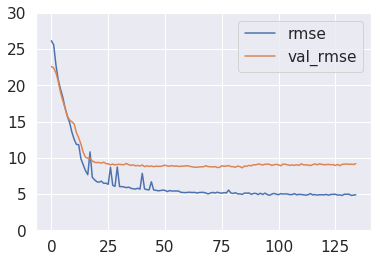

In [838]:
metrics = history.history
plt.plot(history.epoch, np.sqrt(metrics['mse'])*30, np.sqrt(metrics['val_mse'])*30)
plt.legend(['rmse', 'val_rmse'])
axes = plt.axes()
axes.set_ylim([0, 30])
plt.show()

In [839]:
print("Evaluate on vale data")
results = model.evaluate(val_x, val_y, batch_size=64)
print("val rmse:", np.sqrt(results)[0]*30)

Evaluate on vale data
10/10 [==============================] - 0s 466us/step - loss: 0.0827 - mse: 0.0827
val rmse: 8.625376636118377


In [840]:
print("Evaluate on test data")
results = model.evaluate(test_x, test_y, batch_size=64)
print("test rmse:", np.sqrt(results)[0]*30)

Evaluate on test data
14/14 [==============================] - 0s 429us/step - loss: 0.0524 - mse: 0.0524
test rmse: 6.869886593720748


# Evaluate on full length audio

In [123]:
meta = meta.assign(split = '', predict = -99.99, predict_group = 'cc')
for file in tqdm(train_files):
    ID = file.numpy().decode('utf-8').split('/')[-1].split('.')[0]
    predict = model.predict(data[data.ID == ID][data.columns[1:-2]].to_numpy()).flatten().mean() * 30
    meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'predict'] = max(1, min(predict, 30))
    meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'split'] = 'train'
    if (predict < 24):
        meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'predict_group'] = 'cd'
        
for file in tqdm(test_files):
    ID = file.numpy().decode('utf-8').split('/')[-1].split('.')[0]
    predict = model.predict(data[data.ID == ID][data.columns[1:-2]].to_numpy()).flatten().mean() * 30
    meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'predict'] = max(1, min(predict, 30))
    meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'split'] = 'test'
    if (predict < 24):
        meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'predict_group'] = 'cd'
        
for file in tqdm(val_files):
    ID = file.numpy().decode('utf-8').split('/')[-1].split('.')[0]
    predict = model.predict(data[data.ID == ID][data.columns[1:-2]].to_numpy()).flatten().mean() * 30
    meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'predict'] = max(1, min(predict, 30))
    meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'split'] = 'val'
    if (predict < 24):
        meta.at[np.where(meta.ID == (ID + ' '))[0][0], 'predict_group'] = 'cd'




  0%|          | 0/75 [00:00<?, ?it/s]


  5%|▌         | 4/75 [00:00<00:01, 38.76it/s]


 12%|█▏        | 9/75 [00:00<00:01, 39.42it/s]


 19%|█▊        | 14/75 [00:00<00:01, 39.88it/s]


 25%|██▌       | 19/75 [00:00<00:01, 40.38it/s]


 32%|███▏      | 24/75 [00:00<00:01, 40.71it/s]


 37%|███▋      | 28/75 [00:00<00:01, 40.41it/s]


 44%|████▍     | 33/75 [00:00<00:01, 40.42it/s]


 49%|████▉     | 37/75 [00:00<00:00, 39.96it/s]


 56%|█████▌    | 42/75 [00:01<00:00, 40.16it/s]


 63%|██████▎   | 47/75 [00:01<00:00, 40.31it/s]


 69%|██████▉   | 52/75 [00:01<00:00, 40.92it/s]


 76%|███████▌  | 57/75 [00:01<00:00, 40.69it/s]


 83%|████████▎ | 62/75 [00:01<00:00, 40.85it/s]


 89%|████████▉ | 67/75 [00:01<00:00, 40.35it/s]


100%|██████████| 75/75 [00:01<00:00, 40.48it/s]



  0%|          | 0/17 [00:00<?, ?it/s]


 29%|██▉       | 5/17 [00:00<00:00, 41.13it/s]


 53%|█████▎    | 9/17 [00:00<00:00, 40.74it/s]


100%|██████████| 17/17 [00:00<00:00, 40.60it/s]



  0%|          | 

In [124]:
meta.predict.describe()

count    108.000000
mean      22.046586
std        4.594513
min        1.000000
25%       18.844075
50%       22.626012
75%       25.834717
max       28.871157
Name: predict, dtype: float64

In [16]:
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
def cal_rmse(g):
    rmse = np.sqrt(mean_squared_error(g['MMSE'], g['predict'] ) )
    return pd.Series(dict(rmse = rmse ))

meta.groupby('split').apply(cal_rmse).reset_index()

,split,rmse
0,test,4.316775
1,train,5.229134
2,val,3.680355


In [17]:
meta.groupby('Gender').apply(cal_rmse).reset_index()

,Gender,rmse
0,female,5.017447
1,male,4.729802


In [18]:
np.sqrt(mean_squared_error(meta['MMSE'], meta['predict'] ))

4.891693499688055

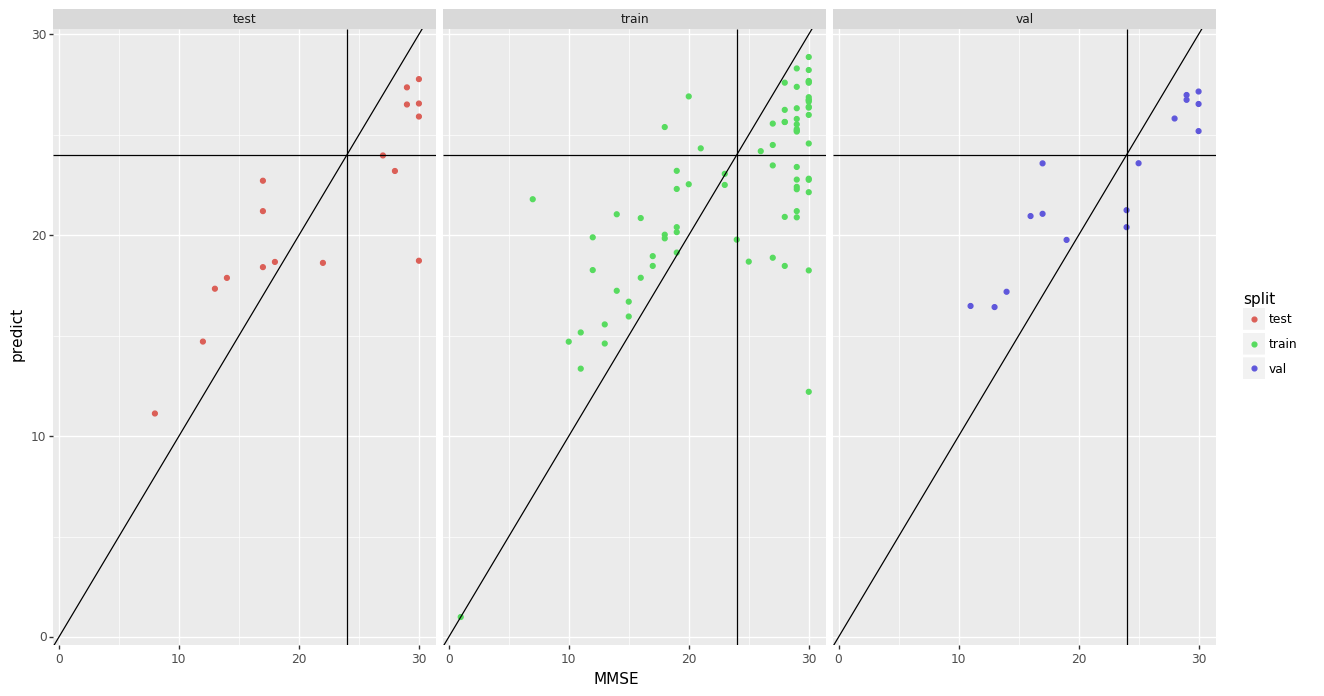

<ggplot: (-9223363246530300051)>

In [19]:
ggplot(meta) + \
geom_point(aes(x = 'MMSE', y = 'predict', colour = 'split')) + \
facet_wrap('split', nrow = 1) + \
geom_abline(aes(intercept = 0, slope = 1, lty = 2)) + \
geom_hline(aes(yintercept = 24, lty = 2)) + \
geom_vline(aes(xintercept = 24, lty = 2)) + \
theme(figure_size = (15, 8))

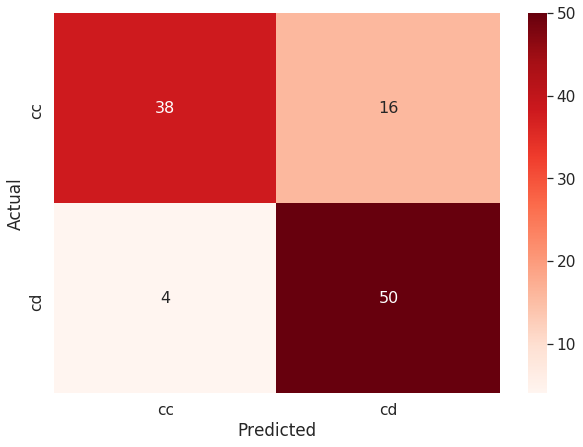

In [20]:
y_true = meta.Group
y_pred = meta.predict_group
data_c = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data_c, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16})# font size

In [21]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

          cc       0.90      0.70      0.79        54
          cd       0.76      0.93      0.83        54

    accuracy                           0.81       108
   macro avg       0.83      0.81      0.81       108
weighted avg       0.83      0.81      0.81       108



In [850]:
# model.save('saved_model/michael/eGeMAPS/')

INFO:tensorflow:Assets written to: saved_model/michael/eGeMAPS/assets


In [4]:
model = tf.keras.models.load_model('saved_model/michael/eGeMAPS/')
model.summary()


Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_62 (Normalizat (None, 88)                177       
_________________________________________________________________
dense_134 (Dense)            (None, 8)                 712       
_________________________________________________________________
dropout_71 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 9         
Total params: 898
Trainable params: 721
Non-trainable params: 177
_________________________________________________________________


# Pitts Corpus

In [5]:
data_path_pitt = '/tf/data/dementia/English/Pitt/'
files_pitt = tf.io.gfile.glob(data_path_pitt + 'Control/cookie/*.wav') + \
             tf.io.gfile.glob(data_path_pitt + 'Dementia/cookie/*.wav')

In [6]:
chunks = tf.io.gfile.glob('/tf/data/dementia/0extra/ADReSS-IS2020-data/train/chunks-30s-pitt/*.wav')

In [7]:
def model_inference(filepath, Group, ID, MMSE):

    import tensorflow as tf
    import numpy as np
    import json
    import requests	
    import os
    from pydub import AudioSegment
    from datetime import datetime
    
    input_file = filepath
    if not filepath.lower().endswith(".wav"):
        input_file = input_file.split('.mp3')[0] + '.wav'
        cmd = "ffmpeg -i " + filepath + " " + input_file
        os.system(cmd)
        
    newAudio = AudioSegment.from_wav(input_file)
    newAudio = newAudio.set_channels(1)
    if len(newAudio)/1000 < 30:
            newAudio = newAudio + AudioSegment.silent(duration=30000- len(newAudio))
            
    predicts = []
#     for t1 in list(range(int(len(newAudio)/1000-29))):
#         exportAudio = newAudio[t1*1000:(t1 + 30)*1000]
#         exportAudio.export('/tf/data/dementia/0extra/ADReSS-IS2020-data/train/temp.wav' , format="wav")
    x = smile.process_files([x for x in chunks if x[66:].split('-')[2] + '-' + x[66:].split('-')[3] == ID], 
                            channel = 0).to_numpy()
#         x = smile.process_files([input_file], channel = newAudio.channels,
#                     starts = [pd.Timedelta(pd.offsets.Second(t1))], 
#                     ends = [pd.Timedelta(pd.offsets.Second(t1 + 30))]).to_numpy()
#         predicts = predicts + [model.predict(x[0:88])[0][0] * 30]
#         print(predicts)
    result = model.predict([a[0:88] for a in x]).flatten().mean()

    return result

In [8]:
smile = opensmile.Smile(feature_set=opensmile.FeatureSet.eGeMAPSv01b, num_workers=15)

In [9]:
meta_pitt = pd.DataFrame(columns= ['file', 'ID', 'Group', 'MMSE', 'predict', 'predict_group'])
for file in tqdm(files_pitt):
#     print(file)
    ID = file.split('/')[-1].split('.')[0]
    Group = file.split('/')[6]
    cha = pd.read_fwf(data_path_pitt + 'Pitt/' + Group + '/cookie/' + ID + '.cha')  
    cha_id = [x for x in cha['@UTF8'] if str.startswith(x, '@ID:')][0]
    
    if (cha_id.split('|')[-3] == ''):
        MMSE = np.NaN
    else:
        MMSE = int(cha_id.split('|')[-3])
        
    x = smile.process_files([x for x in chunks if x[66:].split('-')[2] + '-' + x[66:].split('-')[3] == ID], 
                            channel = 0)
    if (x.shape[0] > 88):
        x = x.iloc[:, 0:88].to_numpy()
        
    predict = model.predict(x).flatten().mean() * 30
    predict = max(min(predict, 30), 1)
    if (predict < 24):
        predict_group = 'Dementia'
    else:
        predict_group = 'Control'
    meta_pitt = meta_pitt.append(pd.DataFrame([[file, ID, Group, MMSE, predict, predict_group]], 
                                  columns = list(meta_pitt.columns)))

100%|██████████| 552/552 [1:03:12<00:00,  6.87s/it]


In [12]:
meta_pitt.predict.describe()

count    552.000000
mean      22.418376
std        4.709531
min        1.000000
25%       19.596765
50%       23.006120
75%       25.520408
max       30.000000
Name: predict, dtype: float64

In [16]:
meta_pitt_eval = meta_pitt[meta_pitt.MMSE.notna()]

In [17]:
np.sqrt(mean_squared_error(meta_pitt_eval['MMSE'], meta_pitt_eval['predict'] ))

7.94404922849773

In [18]:
meta_pitt.shape

(552, 6)

In [19]:
meta_pitt_eval.shape

(457, 6)

In [20]:
meta_pitt_eval.head()

,file,ID,Group,MMSE,predict,predict_group
0,/tf/data/dementia/English/Pitt/Control/cookie/...,255-1,Control,28,17.759423,Dementia
0,/tf/data/dementia/English/Pitt/Control/cookie/...,056-3,Control,29,25.626785,Control
0,/tf/data/dementia/English/Pitt/Control/cookie/...,139-3,Control,30,15.066687,Dementia
0,/tf/data/dementia/English/Pitt/Control/cookie/...,210-2,Control,29,25.299405,Control
0,/tf/data/dementia/English/Pitt/Control/cookie/...,109-1,Control,30,26.835056,Control


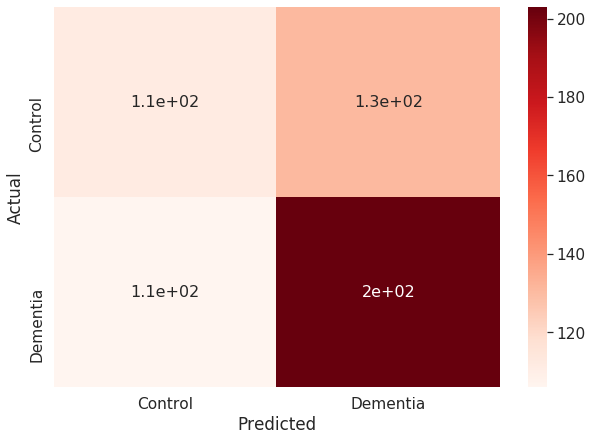

In [21]:
y_true = meta_pitt.Group
y_pred = meta_pitt.predict_group
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Reds", annot=True, annot_kws={"size": 16})# font size

In [22]:
df_cm

Predicted,Control,Dementia
Actual,,
Control,112,131
Dementia,106,203


In [23]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

     Control       0.51      0.46      0.49       243
    Dementia       0.61      0.66      0.63       309

    accuracy                           0.57       552
   macro avg       0.56      0.56      0.56       552
weighted avg       0.57      0.57      0.57       552



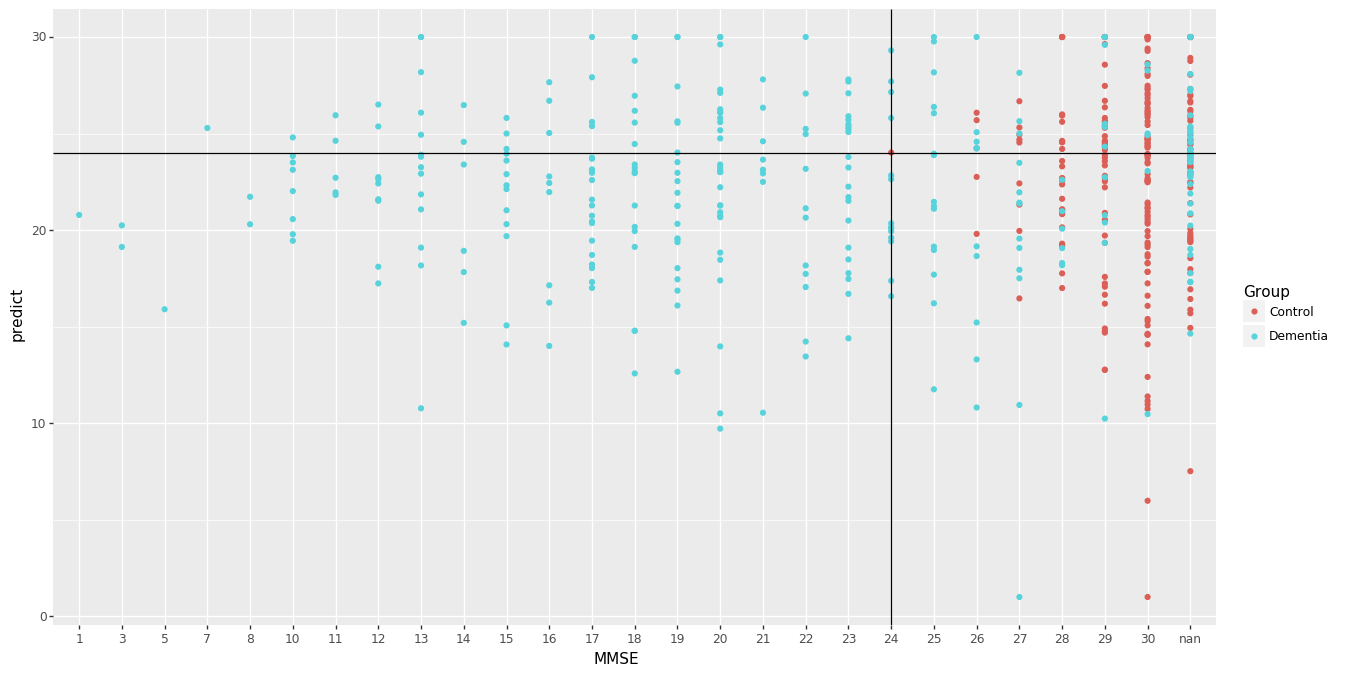

<ggplot: (-9223363245165695011)>

In [24]:
ggplot(meta_pitt) + \
geom_point(aes(x = 'MMSE', y = 'predict', colour = 'Group')) + \
geom_hline(aes(yintercept = 24, lty = 2)) + \
geom_vline(aes(xintercept = 20, lty = 2)) + \
theme(figure_size = (15, 8))

In [25]:
meta_pitt.to_csv(path_or_buf = 'meta_pitt_eGeMAPSv01b.csv', index=True)